# LEAD SCORING CASE STUDY

#### By Divyanshi Sharan, Monalisa Ghosh & Rahul Das


### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

                  
                                
                               Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**


### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [2]:
# Importing lead dataset

lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# inspect leadInfo dataframe

print("*********************************  Info *******************************************") 
print(lead_data.info())
print("*********************************  Shape ******************************************") 
print(lead_data.shape)
print("**************************** Columns having null values *****************************")
print(lead_data.isnull().any())
print("**************************** Describe *****************************")
lead_data.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Cleaning

In [4]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are some columns that have more than 25% null values.

In [5]:
# Check if there are any duplicate values in the dataset

lead_data[lead_data.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

In [6]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

lead_data['Specialization'] = lead_data['Specialization'].replace('Select', np.nan)
lead_data['How did you hear about X Education'] = lead_data['How did you hear about X Education'].replace('Select', np.nan)
lead_data['Lead Profile'] = lead_data['Lead Profile'].replace('Select', np.nan)
lead_data['City'] = lead_data['City'].replace('Select', np.nan)

In [7]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

lead_data = lead_data.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [8]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values :
 - Country
 - Lead Source
 - Total Visits
 - Page Views Per Visit
 - Last Activity    
 - What is your current occupation
 - What matters most to you in choosing a course
    
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [9]:
# Lets check the value counts for each values in the country column

lead_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [10]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(lead_data[lead_data['Country'] == 'India'])/len(lead_data['Country']),2)
print(country_percentage)

70.26


In [11]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

lead_data = lead_data.drop(['Country'], axis=1)

In [12]:
# Check the value counts for the column Lead Source

lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan, 'Google')

In [14]:
# Check the value counts for the column Total Visits

lead_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [15]:
# Check the median of column 

lead_data['TotalVisits'].median()

3.0

In [16]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

lead_data['TotalVisits'] = lead_data['TotalVisits'].replace(np.nan, lead_data['TotalVisits'].median())

In [17]:
# Check the value counts for Page Views Per Visit

lead_data['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [18]:
# Check the median of the column

lead_data['Page Views Per Visit'].median()

2.0

In [19]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

lead_data['Page Views Per Visit'] = lead_data['Page Views Per Visit'].replace(np.nan, lead_data['Page Views Per Visit'].median())

In [20]:
# Check the value counts for the column Last Activity

lead_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [21]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

lead_data['Last Activity'] = lead_data['Last Activity'].replace(np.nan, 'Not Sure')

In [22]:
# Check the value counts for the column "What is your current Occupation"

lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'No Information')

In [24]:
# Check the value counts for the column What matters most to you in choosing a course 

lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
matters_most_percentage = round(100*len(lead_data[lead_data['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(lead_data['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [26]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

lead_data = lead_data.drop(['What matters most to you in choosing a course'], axis=1)

In [27]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data 
concentrated towards one value

In [28]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

lead_data = lead_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [29]:
lead_data.shape

(9240, 20)

##### Outlier Treatment

In [30]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

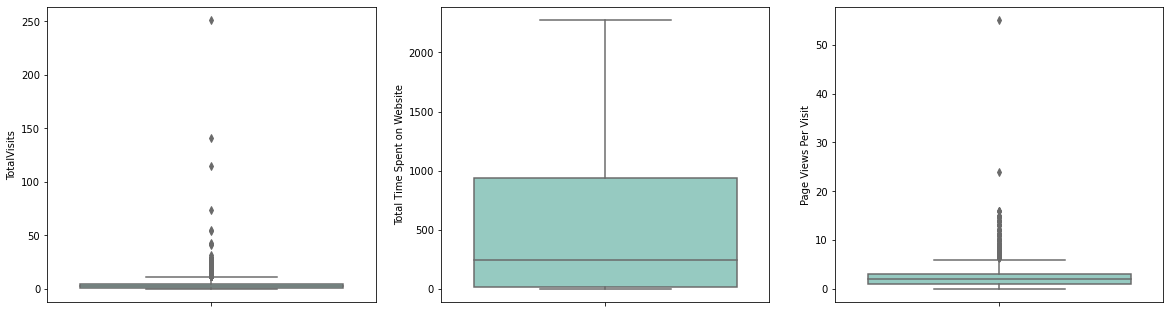

In [31]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = lead_data)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead_data)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_data)
plt.show()

In [32]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = lead_data['TotalVisits'].quantile(0.99)
lead_data = lead_data[lead_data["TotalVisits"] < nn_quartile_total_visits]
lead_data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [33]:
# Checking outliers at 25%,50%,75%,90%,95% and above

lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [34]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[lead_data["Page Views Per Visit"] < nn_quartile_page_visits]
lead_data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [35]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [36]:
# Determine the percentage of data retained

num_data = round(100*(len(lead_data)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

### Step 3: Data Analysis
Let us try and understand the data now based on each columns effect on the conversion rates

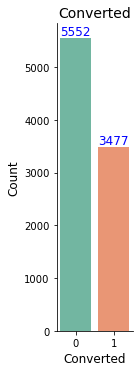

In [37]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=lead_data, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, there has been a overall conversion rate of around 39%

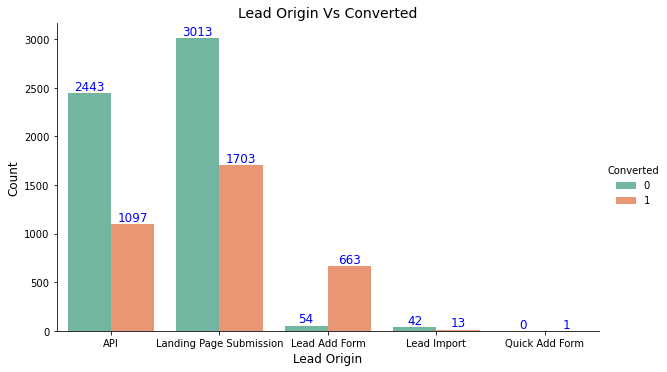

In [38]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

From the above graph, it can be seen that the maximum conversion happened from Landing Page Submission
Also there was only one request from quick add form which got converted.

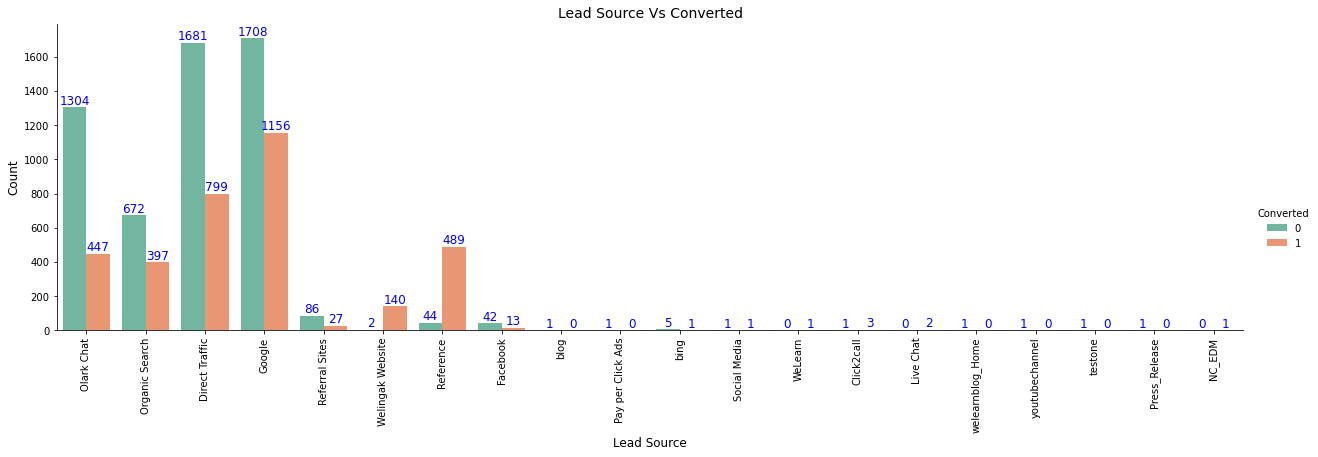

In [39]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

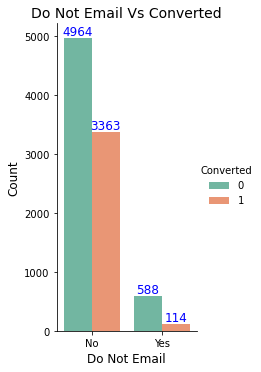

In [40]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 14)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

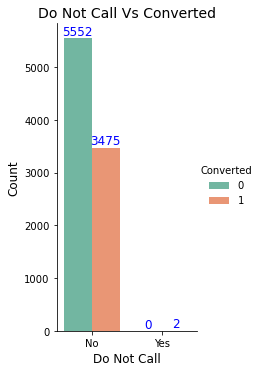

In [41]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

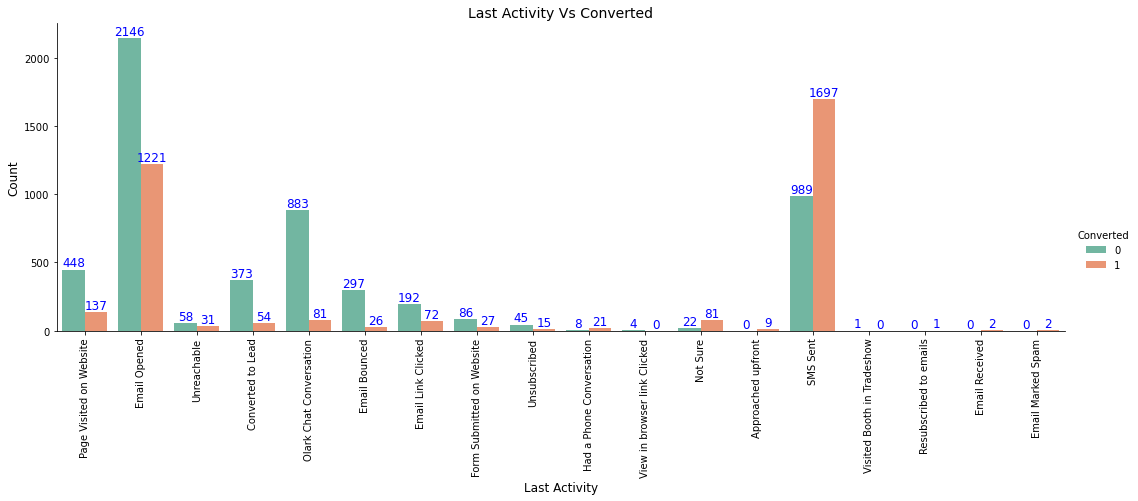

In [42]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

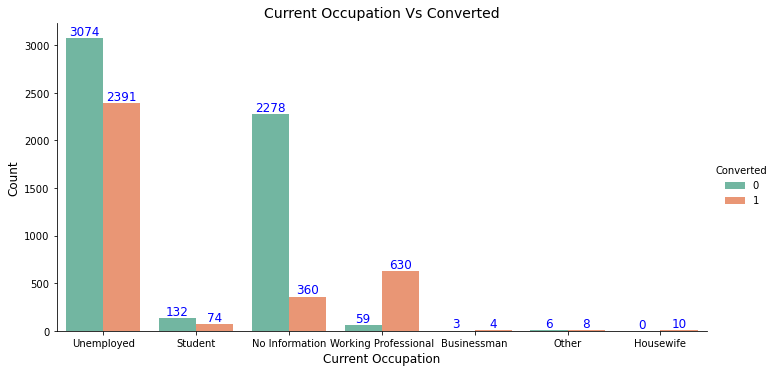

In [43]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_data, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
- Out of 7 business men, 4 got converted
- Out 10 housewives, all 10 leads got converted.

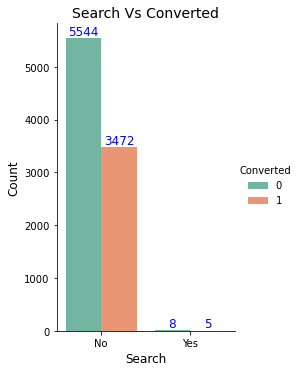

In [44]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

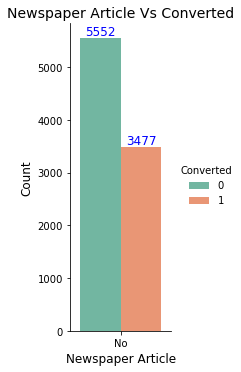

In [45]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [46]:
# Dropping Newspaper Article

lead_data = lead_data.drop(['Newspaper Article'], axis=1)

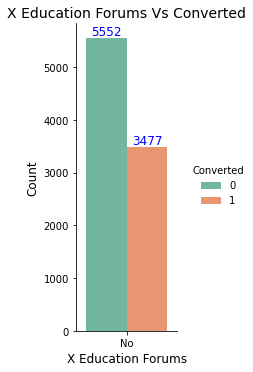

In [47]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [48]:
# Dropping X Education Forum column

lead_data = lead_data.drop(['X Education Forums'], axis=1)

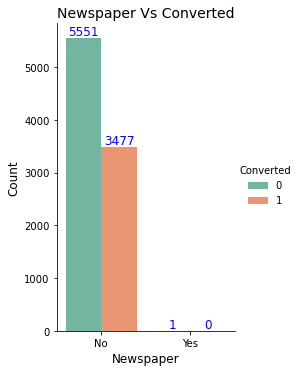

In [49]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [50]:
# Dropping Newspaper column

lead_data = lead_data.drop(['Newspaper'], axis=1)

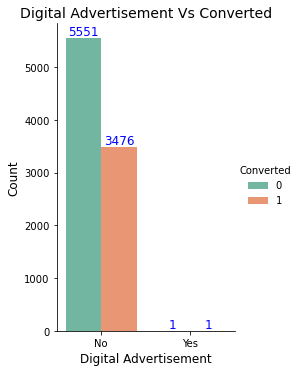

In [51]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

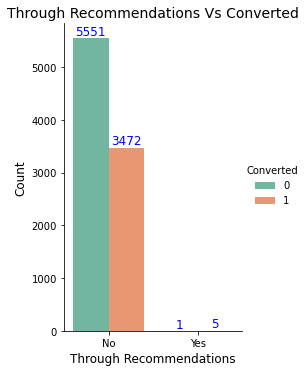

In [52]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

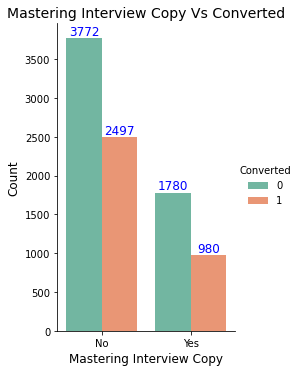

In [53]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_data, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

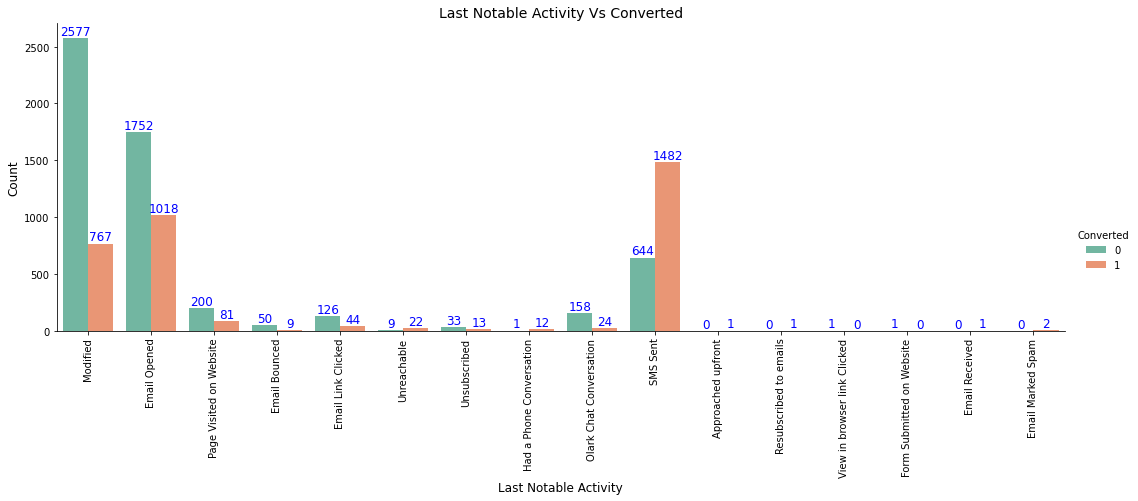

In [54]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead_data, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

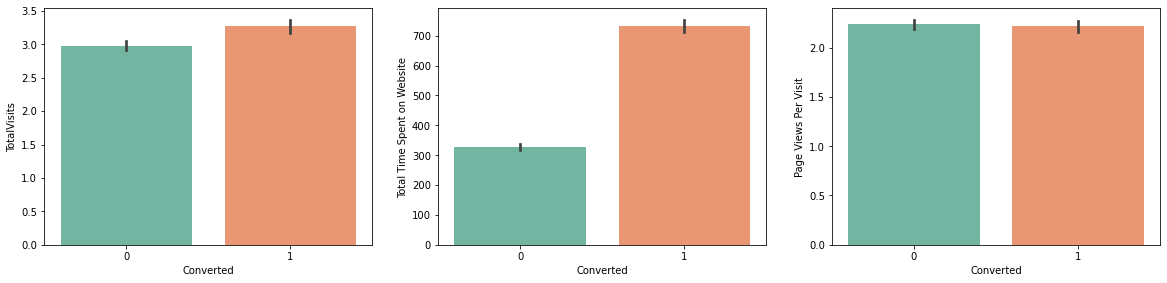

In [55]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead_data)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

## Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [56]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead_data[variablelist] = lead_data[variablelist].apply(binary_map)

In [57]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(lead_data['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
lead_data = pd.concat([lead_data, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(lead_data['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(lead_data['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(lead_data['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(lead_data['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data,d_last_notable_activity1], axis=1)

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

lead_data = lead_data.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [59]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [60]:
# check for percentage of null values in each column

percent_missing = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [61]:
# check shape of the data frame

lead_data.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Test-Train Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Putting feature variable to X

X = lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
# Putting response variable to y

y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Rescaling the features with MinMax Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5493,0,0,0.1250,0.042254,0.250,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8064,0,0,0.1875,0.041373,0.375,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4716,1,0,0.1875,0.099032,0.375,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9117,0,0,0.0000,0.000000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2402,0,0,0.3750,0.381162,0.250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
### Checking the Conversion Rate percentage

converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

38.50924797873519

#### We have almost 39% conversion rate

### Step 7: Model Building
Assessing the model with StatsModels

#### Running the Initial Training Model

In [68]:
import statsmodels.api as sm

In [69]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 15 Aug 2023   Deviance:                   1.2987e+05
Time:                        11:54:20   Pearson chi2:                 6.35e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             7.427e+15   8.04e+07   9.24e+07      0.000    7.43e+15    7.43e+15
Do Not Email                                     -6.326e+14   4.55e+06  -1.39e+08      0.000   -6.33e+14   -6.33e+14
Do Not Call                                        -31.7172   4.73e-07   -6.7e+07      0.000     -31.717     -31.717
TotalVisits                                       3.579e+14   7.55e+06   4.74e+07      0.000    3.58e+14    3.58e+14
Total Time Spent on Website                       1.098e+15   4.09e+06   2.69e+08      0.000     1.1e+15     1.1e+15
Page Views Per Visit                             -9.492e+13   6.35e+06  -1.49e+07      0.000   -9.49e+13   -9.49e+13
Search                                            7.048e+14   2.14e+07   3.29e+07      0.000    7.05e+14    7.05e+14
Digital Advertisement                             5.262e+15   6.73e+07   7.82e+07      0.000    5.26e+15    5.26e+15
Through Recommendations                           3.934e+15   3.39e+07   1.16e+08      0.000    3.93e+15    3.93e+15
A free copy of Mastering The Interview            7.233e+13   2.67e+06    2.7e+07      0.000    7.23e+13    7.23e+13
LeadOrigin_API                                    1.535e+15   2.24e+07   6.86e+07      0.000    1.54e+15    1.54e+15
LeadOrigin_Landing Page Submission                1.407e+15   2.23e+07    6.3e+07      0.000    1.41e+15    1.41e+15
LeadOrigin_Lead Add Form                           2.59e+15   2.45e+07   1.06e+08      0.000    2.59e+15    2.59e+15
LeadOrigin_Lead Import                            1.894e+15   4.33e+07   4.38e+07      0.000    1.89e+15    1.89e+15
LeadSource_Click2call                            -3.831e+15   7.86e+07  -4.87e+07      0.000   -3.83e+15   -3.83e+15
LeadSource_Direct Traffic                        -5.374e+15   6.72e+07  -7.99e+07      0.000   -5.37e+15   -5.37e+15
LeadSource_Facebook                              -6.629e+15   8.25e+07  -8.03e+07      0.000   -6.63e+15   -6.63e+15
LeadSource_Google                                -5.377e+15   6.72e+07     -8e+07      0.000   -5.38e+15   -5.38e+15
LeadSource_Live Chat                             -2.249e+15   8.33e+07   -2.7e+07      0.000   -2.25e+15   -2.25e+15
LeadSource_Olark Chat                            -4.761e+15   6.73e+07  -7.08e+07      0.000   -4.76e+15   -4.76e+15
LeadSource_Organic Search                        -5.444e+15   6.73e+07  -8.09e+07      0.000   -5.44e+15   -5.44e+15
LeadSource_Pay per Click Ads                        -8.3997   2.06e-07  -4.08e+07      0.000      -8.400      -8.400
LeadSource_Press_Release                         -8.392e+15   9.52e+07  -8.81e+07      0.000   -8.39e+15   -8.39e+15
LeadSource_Reference                     

### Step 8: Feature Selection Using RFE

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [71]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True, False, False])

In [73]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 51),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Search', False, 32),
 ('Digital Advertisement', False, 21),
 ('Through Recommendations', False, 7),
 ('A free copy of Mastering The Interview', False, 46),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 27),
 ('LeadSource_Click2call', False, 15),
 ('LeadSource_Direct Traffic', False, 11),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 14),
 ('LeadSource_Live Chat', False, 40),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 12),
 ('LeadSource_Pay per Click Ads', False, 49),
 ('LeadSource_Press_Release', False, 45),
 ('LeadSource_Reference', False, 31),
 ('LeadSource_Referral Sites', False, 13),
 ('LeadSource_Social Media', False, 16),
 ('LeadSource_WeLearn', False, 24),

In [74]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Not Sure', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

#### Rebuilding Model - Model 2

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.8
Date:                Tue, 15 Aug 2023   Deviance:                       5041.5
Time:                        11:54:38   Pearson chi2:                 6.40e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2843      0.425     -3.021      0.003      -2.118      -0.451
Do Not Email                                    -1.1494      0.172     -6.690      0.000      -1.486      -0.813
TotalVisits                                      1.1814      0.250      4.730      0.000       0.692       1.671
Total Time Spent on Website                      4.6125      0.172     26.795      0.000       4.275       4.950
LeadOrigin_API                                  -0.6597      0.433     -1.522      0.128      -1.509       0.190
LeadOrigin_Landing Page Submission              -1.0385      0.430     -2.414      0.016      -1.882      -0.195
LeadOrigin_Lead Add Form                         2.9774      0.456      6.534      0.000       2.084       3.871
LeadSource_Olark Chat                            1.3924      0.136     10.250      0.000       1.126       1.659
LeadSource_Welingak Website                      2.0949      0.745      2.813      0.005       0.635       3.555
LastActivity_Approached upfront                 23.0811   2.44e+04      0.001      0.999   -4.77e+04    4.78e+04
LastActivity_Not Sure                           -1.3958      0.441     -3.162      0.002      -2.261      -0.531
LastActivity_Olark Chat Conversation            -0.8304      0.196     -4.247      0.000      -1.214      -0.447
LastActivity_SMS Sent                            1.2546      0.078     16.099      0.000       1.102       1.407
CurrentOccupation_Housewife                     24.1041   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
CurrentOccupation_No Information                -1.1947      0.089    -13.382      0.000      -1.370      -1.020
CurrentOccupation_Working Professional           2.3766      0.182     13.039      0.000       2.019       2.734
LastNotableActivity_Had a Phone Conversation     3.3534      1.135      2.955      0.003       1.129       5.578
LastNotableActivity_Modified                    -0.8338      0.087     -9.565      0.000      -1.005      -0.663
LastNotableActivity_Olark Chat Conversation     -0.5677      0.375     -1.516      0.130      -1.302       0.166
LastNotableActivity_Page Visited on Website     -0.5222      0.214     -2.443      0.015      -0.941      -0.103
LastNotableActivity_Unreachable                  1.6201      0.556      2.914      0.004       0.531       2.710
================================================================================================================
"""

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,LeadOrigin_Landing Page Submission,4.84
3,LeadOrigin_API,4.64
1,TotalVisits,3.67
6,LeadSource_Olark Chat,2.84
2,Total Time Spent on Website,2.37
16,LastNotableActivity_Modified,2.22
10,LastActivity_Olark Chat Conversation,2.00
5,LeadOrigin_Lead Add Form,1.70
11,LastActivity_SMS Sent,1.63
13,CurrentOccupation_No Information,1.63


Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant

In [77]:
col = col.drop('LastActivity_Approached upfront',1)

#### Rebuilding Model - Model 3

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.1
Date:                Tue, 15 Aug 2023   Deviance:                       5048.2
Time:                        11:54:53   Pearson chi2:                 6.41e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2857      0.425     -3.024      0.002      -2.119      -0.452
Do Not Email                                    -1.1536      0.172     -6.715      0.000      -1.490      -0.817
TotalVisits                                      1.1837      0.250      4.740      0.000       0.694       1.673
Total Time Spent on Website                      4.6207      0.172     26.854      0.000       4.283       4.958
LeadOrigin_API                                  -0.6621      0.433     -1.528      0.127      -1.512       0.187
LeadOrigin_Landing Page Submission              -1.0384      0.430     -2.414      0.016      -1.881      -0.195
LeadOrigin_Lead Add Form                         2.9873      0.456      6.558      0.000       2.094       3.880
LeadSource_Olark Chat                            1.4025      0.136     10.329      0.000       1.136       1.669
LeadSource_Welingak Website                      2.0858      0.745      2.801      0.005       0.626       3.546
LastActivity_Not Sure                           -1.4164      0.441     -3.209      0.001      -2.281      -0.551
LastActivity_Olark Chat Conversation            -0.8448      0.195     -4.324      0.000      -1.228      -0.462
LastActivity_SMS Sent                            1.2517      0.078     16.063      0.000       1.099       1.404
CurrentOccupation_Housewife                     23.0991   1.67e+04      0.001      0.999   -3.28e+04    3.28e+04
CurrentOccupation_No Information                -1.1991      0.089    -13.434      0.000      -1.374      -1.024
CurrentOccupation_Working Professional           2.3727      0.182     13.021      0.000       2.016       2.730
LastNotableActivity_Had a Phone Conversation     3.3546      1.135      2.955      0.003       1.130       5.579
LastNotableActivity_Modified                    -0.8223      0.087     -9.459      0.000      -0.993      -0.652
LastNotableActivity_Olark Chat Conversation     -0.5568      0.375     -1.486      0.137      -1.291       0.177
LastNotableActivity_Page Visited on Website     -0.5233      0.214     -2.447      0.014      -0.943      -0.104
LastNotableActivity_Unreachable                  1.6203      0.556      2.913      0.004       0.530       2.710
================================================================================================================
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,LeadOrigin_Landing Page Submission,4.84
3,LeadOrigin_API,4.64
1,TotalVisits,3.67
6,LeadSource_Olark Chat,2.84
2,Total Time Spent on Website,2.37
15,LastNotableActivity_Modified,2.21
9,LastActivity_Olark Chat Conversation,2.00
5,LeadOrigin_Lead Add Form,1.69
10,LastActivity_SMS Sent,1.63
12,CurrentOccupation_No Information,1.63


Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [80]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Rebuilding Model - Model 4

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.5
Date:                Tue, 15 Aug 2023   Deviance:                       5059.0
Time:                        11:55:10   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2801      0.425     -3.012      0.003      -2.113      -0.447
Do Not Email                                    -1.1576      0.172     -6.741      0.000      -1.494      -0.821
TotalVisits                                      1.1695      0.249      4.688      0.000       0.680       1.658
Total Time Spent on Website                      4.6182      0.172     26.873      0.000       4.281       4.955
LeadOrigin_API                                  -0.6584      0.433     -1.520      0.129      -1.508       0.191
LeadOrigin_Landing Page Submission              -1.0296      0.430     -2.395      0.017      -1.872      -0.187
LeadOrigin_Lead Add Form                         2.9917      0.455      6.570      0.000       2.099       3.884
LeadSource_Olark Chat                            1.3977      0.136     10.302      0.000       1.132       1.664
LeadSource_Welingak Website                      2.0798      0.745      2.793      0.005       0.620       3.539
LastActivity_Not Sure                           -1.4210      0.441     -3.220      0.001      -2.286      -0.556
LastActivity_Olark Chat Conversation            -0.8478      0.195     -4.340      0.000      -1.231      -0.465
LastActivity_SMS Sent                            1.2449      0.078     15.991      0.000       1.092       1.397
CurrentOccupation_No Information                -1.2027      0.089    -13.482      0.000      -1.378      -1.028
CurrentOccupation_Working Professional           2.3665      0.182     12.992      0.000       2.010       2.724
LastNotableActivity_Had a Phone Conversation     3.3466      1.135      2.949      0.003       1.122       5.571
LastNotableActivity_Modified                    -0.8227      0.087     -9.477      0.000      -0.993      -0.653
LastNotableActivity_Olark Chat Conversation     -0.5563      0.374     -1.485      0.137      -1.290       0.178
LastNotableActivity_Page Visited on Website     -0.5275      0.214     -2.467      0.014      -0.947      -0.108
LastNotableActivity_Unreachable                  1.6140      0.556      2.902      0.004       0.524       2.704
================================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,LeadOrigin_Landing Page Submission,4.84
3,LeadOrigin_API,4.63
1,TotalVisits,3.67
6,LeadSource_Olark Chat,2.84
2,Total Time Spent on Website,2.37
14,LastNotableActivity_Modified,2.21
9,LastActivity_Olark Chat Conversation,2.00
5,LeadOrigin_Lead Add Form,1.69
10,LastActivity_SMS Sent,1.63
11,CurrentOccupation_No Information,1.63


Removing column LastNotableActivity_Olark Chat Conversation as it has high pvalue and hence is insignificant

In [83]:
col = col.drop('LastNotableActivity_Olark Chat Conversation',1)

#### Rebuilding Model - Model 5

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.6
Date:                Tue, 15 Aug 2023   Deviance:                       5061.3
Time:                        11:55:29   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.2922      0.425     -3.042      0.002      -2.125      -0.460
Do Not Email                                    -1.1604      0.171     -6.769      0.000      -1.496      -0.824
TotalVisits                                      1.1621      0.249      4.663      0.000       0.674       1.651
Total Time Spent on Website                      4.6046      0.171     26.853      0.000       4.269       4.941
LeadOrigin_API                                  -0.6485      0.433     -1.498      0.134      -1.497       0.200
LeadOrigin_Landing Page Submission              -1.0201      0.430     -2.373      0.018      -1.862      -0.178
LeadOrigin_Lead Add Form                         2.9897      0.455      6.568      0.000       2.098       3.882
LeadSource_Olark Chat                            1.3965      0.136     10.289      0.000       1.130       1.662
LeadSource_Welingak Website                      2.0684      0.744      2.779      0.005       0.610       3.527
LastActivity_Not Sure                           -1.4327      0.441     -3.249      0.001      -2.297      -0.568
LastActivity_Olark Chat Conversation            -1.0024      0.171     -5.859      0.000      -1.338      -0.667
LastActivity_SMS Sent                            1.2476      0.078     16.045      0.000       1.095       1.400
CurrentOccupation_No Information                -1.2078      0.089    -13.551      0.000      -1.383      -1.033
CurrentOccupation_Working Professional           2.3664      0.182     12.986      0.000       2.009       2.724
LastNotableActivity_Had a Phone Conversation     3.3547      1.135      2.956      0.003       1.130       5.579
LastNotableActivity_Modified                    -0.7909      0.084     -9.429      0.000      -0.955      -0.627
LastNotableActivity_Page Visited on Website     -0.5160      0.214     -2.416      0.016      -0.935      -0.097
LastNotableActivity_Unreachable                  1.6236      0.556      2.919      0.004       0.534       2.714
================================================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,LeadOrigin_Landing Page Submission,4.82
3,LeadOrigin_API,4.62
1,TotalVisits,3.67
6,LeadSource_Olark Chat,2.84
2,Total Time Spent on Website,2.37
14,LastNotableActivity_Modified,2.02
5,LeadOrigin_Lead Add Form,1.68
9,LastActivity_Olark Chat Conversation,1.63
11,CurrentOccupation_No Information,1.63
10,LastActivity_SMS Sent,1.62


Removing column LeadOrigin_API as it has high pvalue and hence is insignificant 

In [86]:
col = col.drop('LeadOrigin_API',1)

#### Rebuilding Model - Model 6

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.7
Date:                Tue, 15 Aug 2023   Deviance:                       5063.3
Time:                        11:55:49   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.9085      0.119    -16.093      0.000      -2.141      -1.676
Do Not Email                                    -1.1600      0.171     -6.776      0.000      -1.496      -0.825
TotalVisits                                      1.1295      0.248      4.552      0.000       0.643       1.616
Total Time Spent on Website                      4.5850      0.171     26.846      0.000       4.250       4.920
LeadOrigin_Landing Page Submission              -0.3887      0.091     -4.255      0.000      -0.568      -0.210
LeadOrigin_Lead Add Form                         3.5853      0.230     15.599      0.000       3.135       4.036
LeadSource_Olark Chat                            1.3662      0.134     10.201      0.000       1.104       1.629
LeadSource_Welingak Website                      2.0686      0.744      2.781      0.005       0.611       3.527
LastActivity_Not Sure                           -1.3044      0.447     -2.916      0.004      -2.181      -0.428
LastActivity_Olark Chat Conversation            -1.0071      0.171     -5.893      0.000      -1.342      -0.672
LastActivity_SMS Sent                            1.2468      0.078     16.038      0.000       1.094       1.399
CurrentOccupation_No Information                -1.2082      0.089    -13.562      0.000      -1.383      -1.034
CurrentOccupation_Working Professional           2.3652      0.182     12.981      0.000       2.008       2.722
LastNotableActivity_Had a Phone Conversation     3.3495      1.135      2.952      0.003       1.126       5.573
LastNotableActivity_Modified                    -0.7890      0.084     -9.413      0.000      -0.953      -0.625
LastNotableActivity_Page Visited on Website     -0.5137      0.213     -2.408      0.016      -0.932      -0.096
LastNotableActivity_Unreachable                  1.6183      0.556      2.913      0.004       0.529       2.707
================================================================================================================
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.84
3,LeadOrigin_Landing Page Submission,2.71
2,Total Time Spent on Website,2.09
13,LastNotableActivity_Modified,1.80
4,LeadOrigin_Lead Add Form,1.64
5,LeadSource_Olark Chat,1.63
8,LastActivity_Olark Chat Conversation,1.63
9,LastActivity_SMS Sent,1.54
10,CurrentOccupation_No Information,1.54
6,LeadSource_Welingak Website,1.29


Removing column LastNotableActivity_Page Visited on Website as it has high pvalue and hence insignificant

In [89]:
col = col.drop('LastNotableActivity_Page Visited on Website',1)

#### Rebuilding Model - Model 7

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.7
Date:                Tue, 15 Aug 2023   Deviance:                       5069.4
Time:                        11:56:13   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.9142      0.118    -16.161      0.000      -2.146      -1.682
Do Not Email                                    -1.1784      0.171     -6.899      0.000      -1.513      -0.844
TotalVisits                                      1.0195      0.243      4.188      0.000       0.542       1.497
Total Time Spent on Website                      4.5814      0.171     26.866      0.000       4.247       4.916
LeadOrigin_Landing Page Submission              -0.3852      0.091     -4.221      0.000      -0.564      -0.206
LeadOrigin_Lead Add Form                         3.5734      0.230     15.551      0.000       3.123       4.024
LeadSource_Olark Chat                            1.3519      0.134     10.116      0.000       1.090       1.614
LeadSource_Welingak Website                      2.0710      0.744      2.784      0.005       0.613       3.529
LastActivity_Not Sure                           -1.2894      0.447     -2.885      0.004      -2.165      -0.413
LastActivity_Olark Chat Conversation            -0.9919      0.171     -5.812      0.000      -1.326      -0.657
LastActivity_SMS Sent                            1.2751      0.077     16.573      0.000       1.124       1.426
CurrentOccupation_No Information                -1.2164      0.089    -13.667      0.000      -1.391      -1.042
CurrentOccupation_Working Professional           2.3643      0.182     12.976      0.000       2.007       2.721
LastNotableActivity_Had a Phone Conversation     3.3881      1.133      2.990      0.003       1.168       5.609
LastNotableActivity_Modified                    -0.7665      0.083     -9.193      0.000      -0.930      -0.603
LastNotableActivity_Unreachable                  1.6535      0.556      2.976      0.003       0.565       2.742
================================================================================================================
"""

Since the Model 7 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [91]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.060382
8064    0.091130
4716    0.028178
9117    0.363031
2402    0.457407
1796    0.028277
1120    0.028277
253     0.048776
1491    0.112288
2004    0.339175
dtype: float64

In [92]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06038202, 0.0911299 , 0.0281776 , 0.36303089, 0.45740681,
       0.02827658, 0.02827658, 0.04877595, 0.1122885 , 0.33917478])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.060382,5493
1,0,0.091130,8064
2,0,0.028178,4716
3,0,0.363031,9117
4,1,0.457407,2402


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.060382,5493,0
1,0,0.091130,8064,0
2,0,0.028178,4716,0
3,0,0.363031,9117,0
4,1,0.457407,2402,0


##### Lets check the confusion metrics and accuracy

In [95]:
from sklearn import metrics

In [96]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3472  437]
 [ 724 1687]]


In [97]:
# Predicted     not_converted    converted
# Actual
# not_converted        3472      437
# converted            724       1687

In [98]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8162974683544304


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Checking VIFs

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadOrigin_Landing Page Submission,2.71
1,TotalVisits,2.70
2,Total Time Spent on Website,2.09
13,LastNotableActivity_Modified,1.77
4,LeadOrigin_Lead Add Form,1.63
8,LastActivity_Olark Chat Conversation,1.63
5,LeadSource_Olark Chat,1.62
10,CurrentOccupation_No Information,1.53
9,LastActivity_SMS Sent,1.50
6,LeadSource_Welingak Website,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [100]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6997096640398175

In [102]:
# Let us calculate specificity

TN / float(TN+FP)

0.8882067024814531

In [103]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11179329751854694


In [104]:
# positive predictive value 

print (TP / float(TP+FP))

0.794256120527307


In [105]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8274547187797903


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

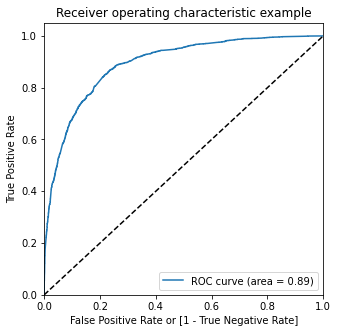

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.060382,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.091130,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.028178,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.363031,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.457407,2402,0,1,1,1,1,1,0,0,0,0,0


In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.641772  0.968893  0.440010
0.2   0.2  0.761076  0.918291  0.664108
0.3   0.3  0.800791  0.871008  0.757483
0.4   0.4  0.814715  0.773123  0.840368
0.5   0.5  0.816297  0.699710  0.888207
0.6   0.6  0.809494  0.632932  0.918393
0.7   0.7  0.788291  0.526752  0.949603
0.8   0.8  0.765190  0.433845  0.969557
0.9   0.9  0.717880  0.279967  0.987976


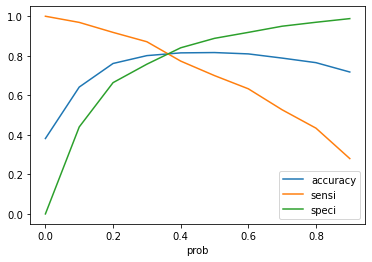

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [112]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.060382,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.091130,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.028178,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.363031,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.457407,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [113]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.060382,5493,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.091130,8064,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.028178,4716,0,1,0,0,0,0,0,0,0,0,0,0,3
3,0,0.363031,9117,0,1,1,1,1,0,0,0,0,0,0,0,36
4,1,0.457407,2402,0,1,1,1,1,1,0,0,0,0,0,1,46
5,0,0.028277,1796,0,1,0,0,0,0,0,0,0,0,0,0,3
6,0,0.028277,1120,0,1,0,0,0,0,0,0,0,0,0,0,3
7,0,0.048776,253,0,1,0,0,0,0,0,0,0,0,0,0,5
8,0,0.112288,1491,0,1,1,0,0,0,0,0,0,0,0,0,11
9,1,0.339175,2004,0,1,1,1,1,0,0,0,0,0,0,0,34


In [114]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1937
0     474
Name: final_predicted, dtype: int64

In [115]:
# check the precentage of final_predicted conversions

1937/float(1937+474)

0.8034010783907093

##### Hence we can see that the final prediction of conversions have a target of 80% (80.34%) conversion as per the X Educations CEO's requirement . Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [116]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8139240506329114

In [117]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3207,  702],
       [ 474, 1937]], dtype=int64)

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8034010783907093

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.8204144282425173

In [121]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.17958557175748274


In [122]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7339901477832512


In [123]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8712306438467807


##### Metrics - Precision and Recall

In [124]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3472,  437],
       [ 724, 1687]], dtype=int64)

In [125]:
from sklearn.metrics import precision_score, recall_score

In [126]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.794256120527307

In [127]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6997096640398175

### Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

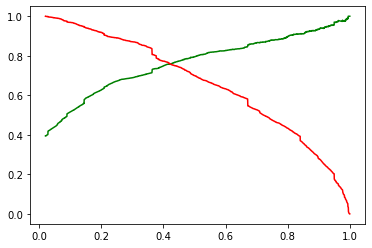

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [132]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [133]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
4664,0,0.0000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0
5394,0,0.2500,0.072183,0,0,1,0,0,0,0,1,0,0,1,0
1595,0,0.2500,0.515405,1,0,0,0,0,0,0,0,1,0,1,0
2111,0,0.4375,0.229754,1,0,0,0,0,0,0,1,0,0,0,0
9182,0,0.0000,0.000000,0,0,1,0,0,0,1,0,0,0,1,0


In [134]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [135]:
y_test_pred = res.predict(X_test_sm)

In [136]:
y_test_pred[:10]

4664    0.363031
5394    0.123518
1595    0.871543
2111    0.117415
9182    0.486595
1055    0.665317
541     0.098977
446     0.989357
3728    0.016657
4249    0.006908
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head

y_pred_1.head()

,0
4664,0.363031
5394,0.123518
1595,0.871543
2111,0.117415
9182,0.486595


In [139]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,LeadId,0
0,0,4664,0.363031
1,0,5394,0.123518
2,1,1595,0.871543
3,0,2111,0.117415
4,0,9182,0.486595


In [144]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [145]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [146]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4664,0,0.363031
1,5394,0,0.123518
2,1595,1,0.871543
3,2111,0,0.117415
4,9182,0,0.486595


In [147]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [148]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4664,0,0.363031,0
1,5394,0,0.123518,0
2,1595,1,0.871543,1
3,2111,0,0.117415,0
4,9182,0,0.486595,1


In [149]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,4664,0,0.363031,0,36
1,5394,0,0.123518,0,12
2,1595,1,0.871543,1,87
3,2111,0,0.117415,0,12
4,9182,0,0.486595,1,49
5,1055,1,0.665317,1,67
6,541,0,0.098977,0,10
7,446,1,0.989357,1,99
8,3728,0,0.016657,0,2
9,4249,0,0.006908,0,1


In [150]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    867
0    199
Name: final_predicted, dtype: int64

In [151]:
# check the precentage of final_predicted conversions on test data

867/float(867+199)

0.8133208255159474

##### Hence we can see that the final prediction of conversions have a target rate of 81% (81.3%) (Around 1% difference from the predictions made on training data set)

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [152]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.813953488372093

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1338,  305],
       [ 199,  867]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8133208255159474

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.8143639683505782

##### Precision and Recall metrics for the test set 

In [157]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7397610921501706
recall  0.8133208255159474


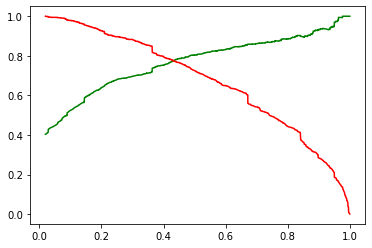

In [158]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Conclusion :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
      optimal 
      cut off based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 82% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 80%
    - Hence overall this model seems to be good.   